In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

## Volatility 가 높을 때

ex) Netflex 는 2016 년 Jan 29 에 $91.15 에 close 되었다.  이것은 연초부터 현재까지 20% 하락한 것이다. 

2015 년에는 2 배 이상 뛰었었다. 주가가 계속 떨어질 것으로 예상하는 trader 는 $90 행사가의 2016 년 6월 만기 PUT 을 살 수 있다.

이 PUT 의 IV 는 2016 년 Jan 29 에 53% 였고, 가격은 $11.40 이었다.

이 것은 Netflex 가 $12.55 혹은 14% 하락해야 PUT position 에 수익이 난다는 뜻이다. 

이 전략은 단순하지만, expensive 하다. 따라서 trader 는 long PUT position 을 취하기 위한 cost 를 줄이기 위해 좀 더 out-of-the money 인 PUT 을 사거나, 더 낮은 가격의 PUT position 을 short 하여 cost 를 줄일 수 있는데 이 것이 bear put spread 로 알려진 전략이다.

Netflex 의 경우, trader 는 다음과 같이 position 을 취할 수 있다.

    1) 더 out-of-the money 인 Put   구매 : June $80 put 을 $7.15 에 BUY ($90 PUT 보다 $4.25 또는 37% 싸다) 

    2) $11.40  에 $90 PUT BUY, $6.75 에 $80 PUT SELL : net cost 는 $3.65  ==> Bear Put Spread

## Bear Put Spread

In [76]:
# 현물 가격
spot_price = 91.15

# Long call : 풋옵션 구입
strike_price_long_put = 90 
premium_long_put = 11.40 

# Short call : 같은 만기일 더 낮은 행사가의 풋옵션 매도
strike_price_short_put = 80 
premium_short_put = 6.75

# 만기일 주가
sT_expiry = [np.int(strike_price_long_put * 1.1), strike_price_long_put, 
             np.int((strike_price_long_put + strike_price_short_put)), 
             strike_price_short_put, np.int(strike_price_short_put * 0.9)]

print('Bear Put Spread 손익\n')
print('높은행사가의 풋 구입 :', strike_price_long_put)
print('낮은행사가의 풋 매도 :', strike_price_short_put)
print('만기일주가, 손익')

for sT in sT_expiry:
    payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
    payoff_short_put = -put_payoff(sT, strike_price_short_put, premium_short_put)
    payoff_bear_put_spread = payoff_long_put + payoff_short_put
    print('  ', sT, '  ', payoff_bear_put_spread)

Bear Put Spread 손익

높은행사가의 풋 구입 : 90
낮은행사가의 풋 매도 : 80
만기일주가, 손익
   99    -4.65
   90    -4.65
   170    -4.65
   80    5.35
   72    5.35


Max Profit : 3.314999999999989
Max Loss : -4.65


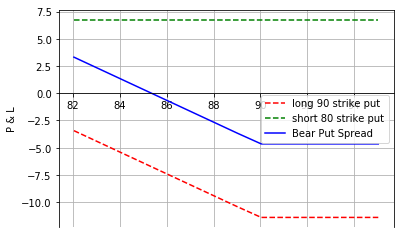

In [77]:
# Stock price range at expiration of the call
sT = np.arange(0.9*spot_price,1.05*spot_price,1) 

payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)
payoff_short_put =  -put_payoff(sT, strike_price_short_put, premium_short_put)
payoff_bear_put_spread = payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
ax.plot(sT, payoff_long_put, 'r--', 
        label="long "+str(strike_price_long_put)+" strike put")

ax.plot(sT, payoff_short_put, 'g--', 
        label="short "+str(strike_price_short_put)+" strike put")

ax.plot(sT, payoff_bear_put_spread, 'b-', label="Bear Put Spread")
plt.grid(True)
plt.ylabel('P & L')
plt.legend()
print("Max Profit :", max(payoff_bear_put_spread))
print("Max Loss :", min(payoff_bear_put_spread))